In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings


warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [4]:
# Loading data files
battles = pd.read_csv("data_files/battles.csv")
character_deaths = pd.read_csv("data_files/character-deaths.csv")
character_predictions = pd.read_csv("data_files/character-predictions.csv")

### EDA on battles dataset

In [35]:
# Adding new features to the dataset
battles.loc[:, "defender_count"] = (4 - battles[["defender_1", "defender_2", "defender_3", "defender_4"]].isnull().sum(axis = 1))
battles.loc[:, "attacker_count"] = (4 - battles[["attacker_1", "attacker_2", "attacker_3", "attacker_4"]].isnull().sum(axis = 1))

In [6]:
battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

In [7]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note,defender_count,attacker_count
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN,1,1
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN,1,1
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN,1,1
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN,1,1
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN,1,2


In [8]:
# Check for Missing Values
print("Missing Values:\n", battles.isnull().sum())

Missing Values:
 name                   0
year                   0
battle_number          0
attacker_king          2
defender_king          3
attacker_1             0
attacker_2            28
attacker_3            35
attacker_4            36
defender_1             1
defender_2            36
defender_3            38
defender_4            38
attacker_outcome       1
battle_type            1
major_death            1
major_capture          1
attacker_size         14
defender_size         19
attacker_commander     1
defender_commander    10
summer                 1
location               1
region                 0
note                  33
defender_count         0
attacker_count         0
dtype: int64


In [9]:
# Handle missing values 
battles["attacker_king"].fillna("Unknown", inplace=True)
battles["defender_king"].fillna("Unknown", inplace=True)
battles["attacker_outcome"].fillna("Unknown", inplace=True)

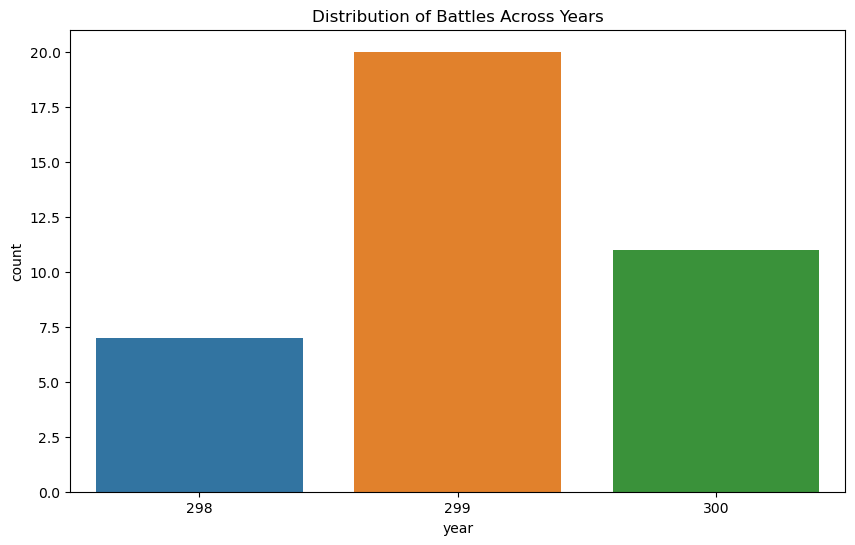

In [10]:
# Examine the Distribution of Battles Across Years
plt.figure(figsize=(10, 6))
sns.countplot(x="year", data=battles)
plt.title("Distribution of Battles Across Years")
plt.show()

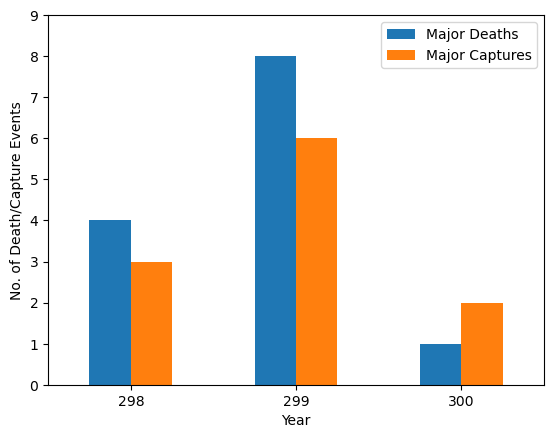

In [37]:
majorevents = battles.groupby('year').sum()[["major_death", "major_capture"]].plot.bar(rot = 0)
_ = majorevents.set(xlabel = "Year", ylabel = "No. of Death/Capture Events", ylim = (0, 9)), majorevents.legend(["Major Deaths", "Major Captures"])

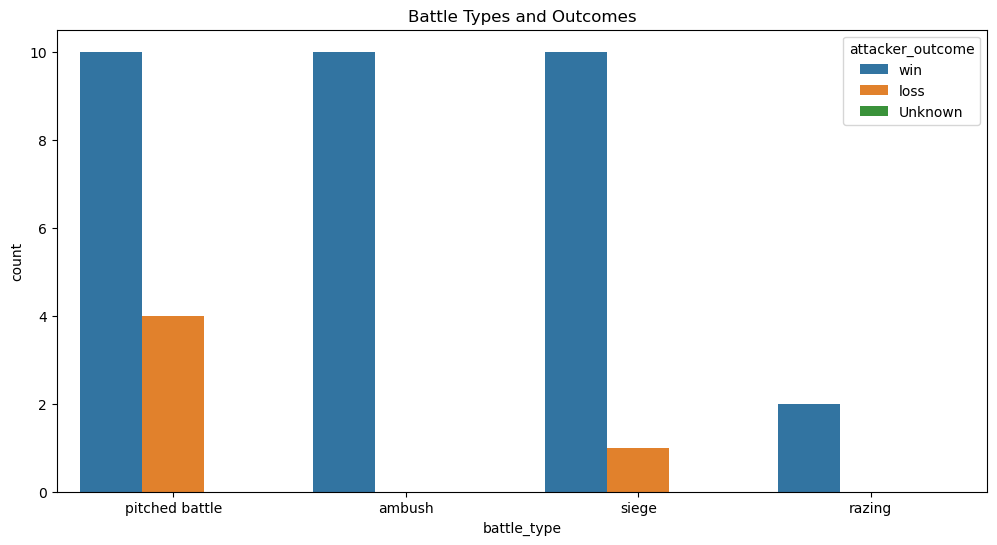

In [12]:
# Explore Types of Battles and Their Outcomes
plt.figure(figsize=(12, 6))
sns.countplot(x="battle_type", hue="attacker_outcome", data=battles)
plt.title("Battle Types and Outcomes")
plt.show()

In [13]:
# Investigate the Involvement of Attackers and Defenders
attackers = battles[["attacker_1", "attacker_2", "attacker_3", "attacker_4"]].stack().value_counts()
defenders = battles[["defender_1", "defender_2", "defender_3", "defender_4"]].stack().value_counts()


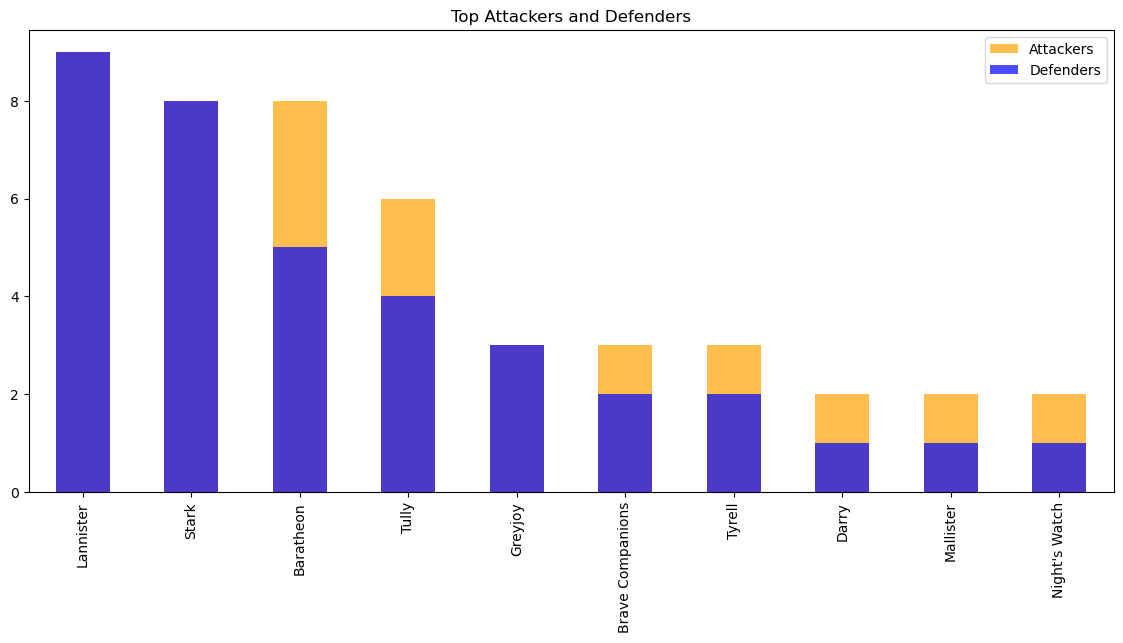

In [14]:
# Plotting the top attackers and defenders
plt.figure(figsize=(14, 6))
attackers.head(10).plot(kind="bar", color="orange", alpha=0.7, label="Attackers")
defenders.head(10).plot(kind="bar", color="blue", alpha=0.7, label="Defenders")
plt.title("Top Attackers and Defenders")
plt.legend()
plt.show()


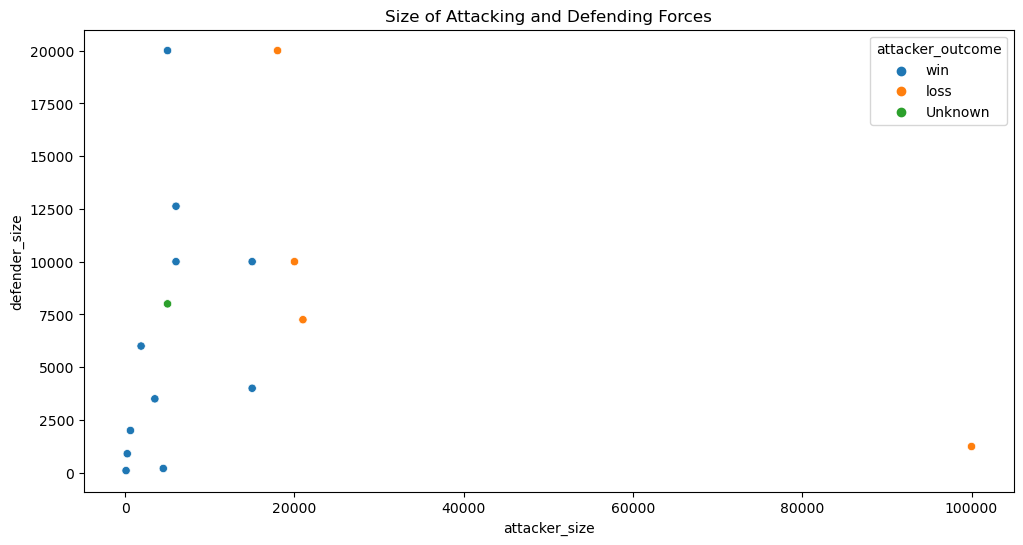

In [15]:
# Analyze the Size of Attacking and Defending Forces
plt.figure(figsize=(12, 6))
sns.scatterplot(x="attacker_size", y="defender_size", data=battles, hue="attacker_outcome")
plt.title("Size of Attacking and Defending Forces")
plt.show()

### EDA on character_deaths dataset

In [16]:
character_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [17]:
character_deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [18]:
# Check for Missing Values
print("Missing Values:\n", character_deaths[["Death Year", "Book of Death", "Death Chapter"]].isnull().sum())


Missing Values:
 Death Year       612
Book of Death    610
Death Chapter    618
dtype: int64


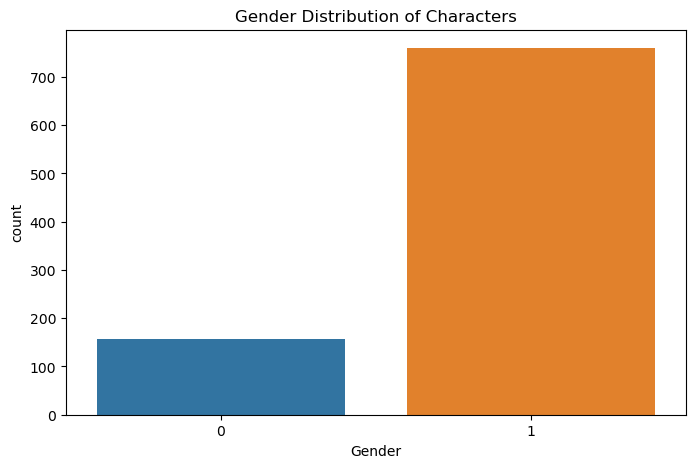

In [19]:
# Explore Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Gender", data=character_deaths)
plt.title("Gender Distribution of Characters")
plt.show()

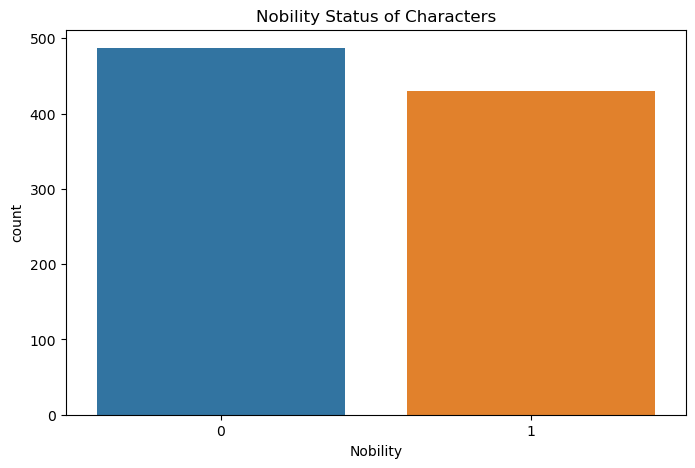

In [20]:
# Analyze Nobility Status
plt.figure(figsize=(8, 5))
sns.countplot(x="Nobility", data=character_deaths)
plt.title("Nobility Status of Characters")
plt.show()

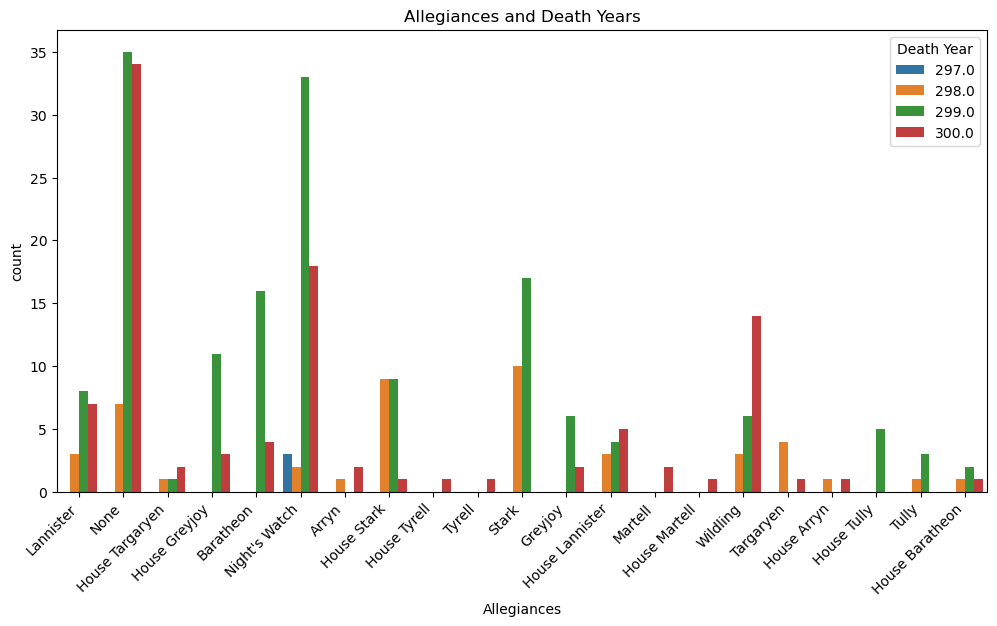

In [21]:
# Investigate Allegiances and Their Relation to Fates
plt.figure(figsize=(12, 6))
sns.countplot(x="Allegiances", hue="Death Year", data=character_deaths)
plt.xticks(rotation=45, ha="right")
plt.title("Allegiances and Death Years")
plt.show()

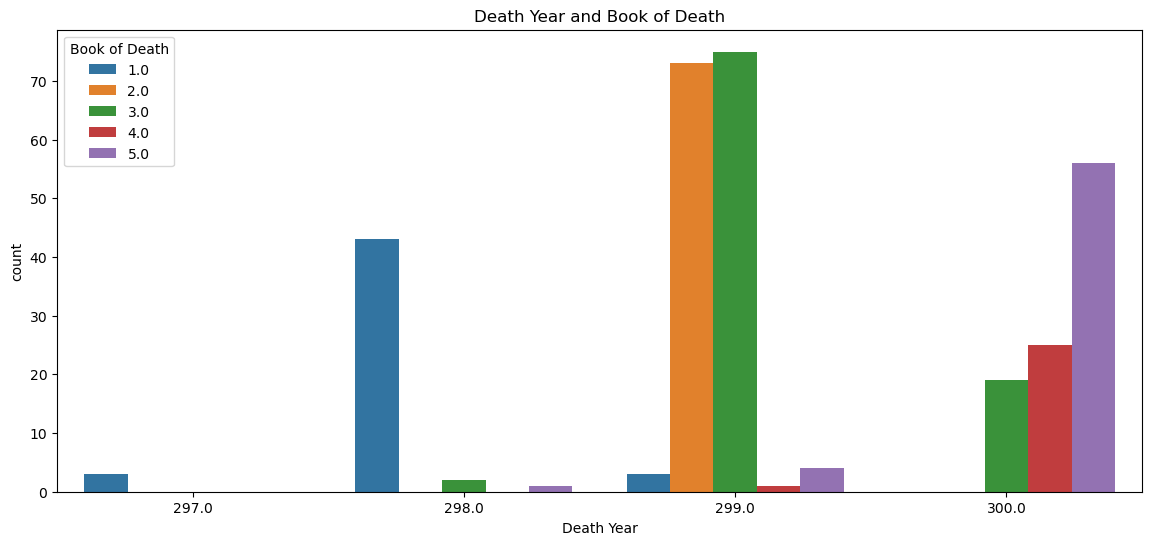

In [22]:
# Examine Death-related Columns
plt.figure(figsize=(14, 6))
sns.countplot(x="Death Year", hue="Book of Death", data=character_deaths)
plt.title("Death Year and Book of Death")
plt.show()

### EDA on character_predictions dataset

In [23]:
# Check for NANs values
data_NaN = character_predictions.isna().sum()

In [24]:
data_NaN[data_NaN > 0]

title            1008
culture          1269
dateOfBirth      1513
DateoFdeath      1502
mother           1925
father           1920
heir             1923
house             427
spouse           1670
isAliveMother    1925
isAliveFather    1920
isAliveHeir      1923
isAliveSpouse    1670
age              1513
dtype: int64

In [25]:
len(data_NaN)

33

In [26]:
print(character_predictions["age"].mean())

-1293.5635103926097


In [27]:
# Check which characters have a negative age and it's value.
print(character_predictions["name"][character_predictions["age"] < 0])
print(character_predictions['age'][character_predictions['age'] < 0])

1684    Doreah
1868    Rhaego
Name: name, dtype: object
1684   -277980.0
1868   -298001.0
Name: age, dtype: float64


In [28]:
character_predictions.loc[1684, "age"] = 24.0 # Doreah is actually around 24
character_predictions.loc[1868, "age"] = 0.0 #Rhaego was never born

In [29]:
print(character_predictions["age"].mean())

36.70207852193995


In [30]:
character_predictions["age"].fillna(character_predictions["age"].mean(), inplace=True)
character_predictions["culture"].fillna("", inplace=True)

# Some values are nan because we dont know them so fill them with -1
character_predictions.fillna(value=-1, inplace=True)

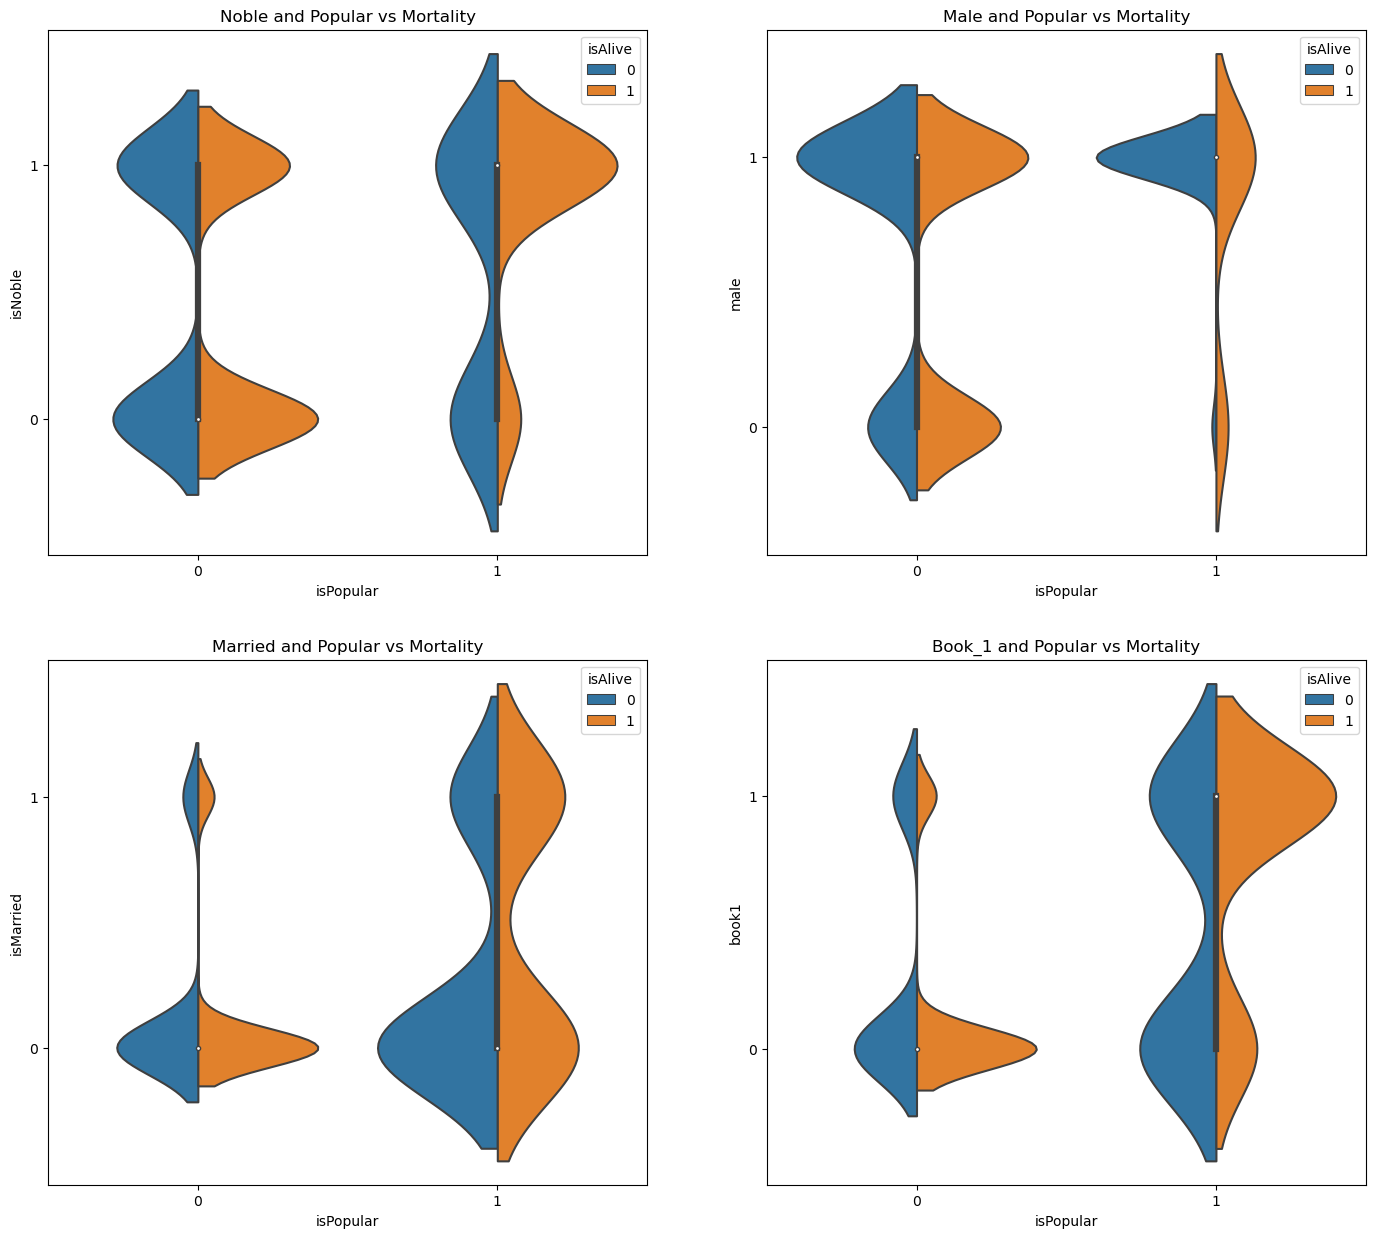

In [38]:
# plotting violin plots
f,ax=plt.subplots(2,2,figsize=(17,15))
sns.violinplot(data=character_predictions, x="isPopular", y="isNoble", hue="isAlive",split=True, ax=ax[0, 0])
ax[0, 0].set_title('Noble and Popular vs Mortality')
ax[0, 0].set_yticks(range(2))

sns.violinplot(data=character_predictions, x="isPopular", y="male", hue="isAlive", split=True, ax=ax[0, 1])
ax[0, 1].set_title('Male and Popular vs Mortality')
ax[0, 1].set_yticks(range(2))

sns.violinplot(data=character_predictions , x="isPopular", y="isMarried", hue="isAlive", split=True, ax=ax[1, 0])
ax[1, 0].set_title('Married and Popular vs Mortality')
ax[1, 0].set_yticks(range(2))


sns.violinplot(data=character_predictions , x="isPopular", y="book1", hue="isAlive", split=True, ax=ax[1, 1])
ax[1, 1].set_title('Book_1 and Popular vs Mortality')
ax[1, 1].set_yticks(range(2))


plt.show()

Interpretation: 
* Noble and popular most likely alive
* Popular appearing in book1 most likely dead
* Not popular appearing in book1 most likely alive
* Single and not popular most likely alive
* Single and popular probably dead

In [32]:
set(character_predictions['culture'])

{'',
 'Andal',
 'Andals',
 'Asshai',
 "Asshai'i",
 'Astapor',
 'Astapori',
 'Braavos',
 'Braavosi',
 'Crannogmen',
 'Dorne',
 'Dornish',
 'Dornishmen',
 'Dothraki',
 'First Men',
 'Free Folk',
 'Free folk',
 'Ghiscari',
 'Ghiscaricari',
 'Ibbenese',
 'Ironborn',
 'Ironmen',
 'Lhazareen',
 'Lhazarene',
 'Lysene',
 'Lyseni',
 'Meereen',
 'Meereenese',
 'Myrish',
 'Naathi',
 'Northern mountain clans',
 'Northmen',
 'Norvos',
 'Norvoshi',
 'Pentoshi',
 'Qarth',
 'Qartheen',
 'Qohor',
 'Reach',
 'Reachmen',
 'Rhoynar',
 'Riverlands',
 'Rivermen',
 'Sistermen',
 'Stormlander',
 'Stormlands',
 'Summer Islander',
 'Summer Islands',
 'Summer Isles',
 'The Reach',
 'Tyroshi',
 'Vale',
 'Vale mountain clans',
 'Valemen',
 'Valyrian',
 'Westerlands',
 'Westerman',
 'Westermen',
 'Westeros',
 'Wildling',
 'Wildlings',
 'free folk',
 'ironborn',
 'northmen',
 'westermen'}

In [60]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
    'Ironborn': ['ironborn', 'ironmen'],
    'Mereen': ['meereen', 'meereenese'],
    'RiverLands': ['riverlands', 'rivermen'],
    'Vale': ['vale', 'valemen', 'vale mountain clans']
}

def get_cult(value):
    value = value.lower()
    v = [k for (k, v) in cult.items() if value in v]
    return v[0] if len(v) > 0 else value.title()

character_predictions.loc[:, "culture"] = [get_cult(x) for x in character_predictions["culture"]]

## Random Forest

In [34]:
# Combine datasets based on common keys
merged_data = pd.merge(character_predictions, character_deaths, how='left', left_on="name", right_on='Name')

# Identify features and target variable
selected_features = ['isNoble', 'male', 'age', 'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity']
X = merged_data[selected_features]
y = merged_data['actual']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=1000, random_state=0)

# Train the model with imputed data
rf_model.fit(X_train_imputed, y_train)

# Make predictions on the test set with imputed data
y_pred = rf_model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.7461538461538462
Confusion Matrix:
[[ 31  75]
 [ 24 260]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.29      0.39       106
           1       0.78      0.92      0.84       284

    accuracy                           0.75       390
   macro avg       0.67      0.60      0.61       390
weighted avg       0.72      0.75      0.72       390

